## Observations and Insights 

In [188]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mousedata.head()                

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [189]:
#mousedata.describe

In [190]:
#mousedata.index

In [191]:
# Checking the number of mice.
number_of_mice = mousedata["Mouse ID"].count()
print(f"There are {number_of_mice} total mice")

There are 1893 total mice


In [192]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_list = mousedata[mousedata.duplicated(["Mouse ID","Timepoint"])]
duplicate_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [193]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = mousedata[mousedata.duplicated(["Mouse ID"])]
duplicate_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [194]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mousedata.drop_duplicates("Mouse ID")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [195]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

249

## Summary Statistics

In [196]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = mousedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#print(mean_tumor)
median_tumor = mousedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
#print(median_tumor)
variance_tumor = mousedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#print(variance_tumor)
std_tumor = mousedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#print(std_tumor)
sem_tumor = mousedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#print(sem_tumor)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_df = pd.DataFrame({"Mean":mean_tumor,
                        "Median":median_tumor,
                        "Variance":variance_tumor,
                        "Standard Deviation":std_tumor,
                        "SEM":sem_tumor})
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

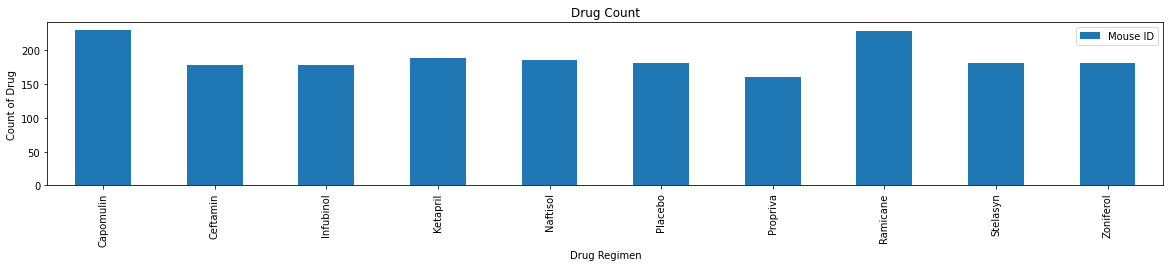

In [197]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugindex = pd.DataFrame(mousedata.groupby(["Drug Regimen"]).count()).reset_index()
bardata = drugindex[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")
bardata
bardata.plot(kind="bar", figsize=(20,3))
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Drug")
plt.title("Drug Count")
plt.show()


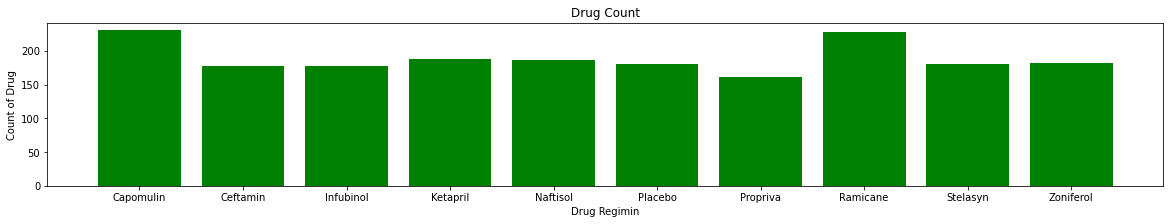

In [198]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = tumor_df.index.tolist()
drugs
count_drugs = (mousedata.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
count_drugs
x_axis = drugs
y_axis = count_drugs
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color="green")
plt.xlabel("Drug Regimin")
plt.ylabel("Count of Drug")
plt.title("Drug Count")
plt.show()





In [199]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderdata = pd.DataFrame(mousedata.groupby(["Sex"]).count()).reset_index()
genderdata = genderdata[["Sex","Mouse ID"]]
genderdata



,Sex,Mouse ID
0,Female,935
1,Male,958


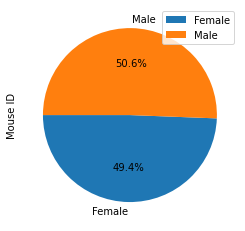

In [200]:
genderdata.plot(kind="pie", y = "Mouse ID", startangle=180, labels=genderdata["Sex"],autopct='%1.1f%%')
plt.show()

In [201]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pltgender = (mousedata.groupby(["Sex"])["Mouse ID"].count()).tolist()
pltgender
labels = ["Females", "Males"]
colors = ["green","blue"]
explode = (0.2, 0)


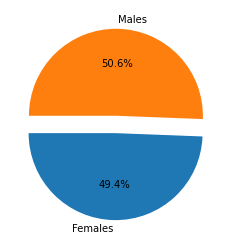

In [202]:
plt.pie(pltgender, explode=explode, labels=labels, autopct='%1.1f%%', startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [203]:
#  Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#  Capomulin, Ramicane, Infubinol, and Ceftamin
mousedata.head()
#  Start by getting the last (greatest) timepoint for each mouse
timepoint = mousedata.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
timepointdf = timepoint.loc[timepoint["Timepoint"] == 45]
timepointdf.head().reset_index()

#  Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mousedata2 = timepointdf
mousedata2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [204]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
capo_df = mousedata.loc[mousedata["Drug Regimen"] == "Capomulin",:]
capo_df
ram_df = mousedata.loc[mousedata["Drug Regimen"] == "Ramicane",:]
ram_df
inf_df = mousedata.loc[mousedata["Drug Regimen"] == "Infubinol",:]
inf_df
cef_df = mousedata.loc[mousedata["Drug Regimen"] == "Ceftamin",:]
cef_df

capolast = capo_df.groupby("Mouse ID").max()["Timepoint"]
capolastdf = pd.DataFrame(capolast)
capolastdf
combinedcapo = pd.merge(capolastdf, mousedata, on=("Mouse ID","Timepoint"), how="left")
combinedcapo.head()

tumors = combinedcapo["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerquantile = quartiles[.25]
upperquantile = quartiles[.75]
iqr = upperquantile - lowerquantile

print(f"The lower quartile of Capomulin tumors: {lowerquantile}")
print(f"The upper quartile of Capomulin tumors: {upperquantile}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lowerb = lowerquantile - (1.5*iqr)
upperb = upperquantile + (1.5*iqr)

print(f"Outliers would be below {lowerb} or above {upperb}")
    

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Outliers would be below 20.70456164999999 or above 51.83201549


In [205]:
#Ram
ramlast = ram_df.groupby("Mouse ID").max()["Timepoint"]
ramlastdf = pd.DataFrame(ramlast)
ramlastdf
combinedram = pd.merge(ramlastdf, mousedata, on=("Mouse ID","Timepoint"))
combinedram

ramtumors = combinedram["Tumor Volume (mm3)"]

quartiles = ramtumors.quantile([.25,.5,.75])
lowerquantile = quartiles[.25]
upperquantile = quartiles[.75]
iqr = upperquantile - lowerquantile

print(f"The lower quartile of Ramicane tumors: {lowerquantile}")
print(f"The upper quartile of Ramicane tumors: {upperquantile}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]}")

lowerb = lowerquantile - (1.5*iqr)
upperb = upperquantile + (1.5*iqr)

print(f"Outliers would be below {lowerb} or above {upperb}")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
Outliers would be below 17.912664470000003 or above 54.30681135


In [206]:
#Inf 
inflast = inf_df.groupby("Mouse ID").max()["Timepoint"]
inflastdf = pd.DataFrame(inflast)
inflastdf
combinedinf = pd.merge(inflastdf, mousedata, on=("Mouse ID","Timepoint"), how="left")
combinedinf.head()

inftumors = combinedinf["Tumor Volume (mm3)"]

quartiles = inftumors.quantile([.25,.5,.75])
lowerquantile = quartiles[.25]
upperquantile = quartiles[.75]
iqr = upperquantile - lowerquantile

print(f"The lower quartile of Infubinol tumors: {lowerquantile}")
print(f"The upper quartile of Infubinol tumors: {upperquantile}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lowerb = lowerquantile - (1.5*iqr)
upperb = upperquantile + (1.5*iqr)

print(f"Outliers would be below {lowerb} or above {upperb}")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Outliers would be below 36.83290494999999 or above 82.74144559000001


In [207]:
#Cef
ceflast = cef_df.groupby("Mouse ID").max()["Timepoint"]
ceflastdf = pd.DataFrame(ceflast)
ceflastdf
combinedcef = pd.merge(ceflastdf, mousedata, on=("Mouse ID","Timepoint"))
combinedcef.head()

ceftumors = combinedcef["Tumor Volume (mm3)"]

quartiles = ceftumors.quantile([.25,.5,.75])
lowerquantile = quartiles[.25]
upperquantile = quartiles[.75]
iqr = upperquantile - lowerquantile

print(f"The lower quartile of Infubinol tumors: {lowerquantile}")
print(f"The upper quartile of Infubinol tumors: {upperquantile}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lowerb = lowerquantile - (1.5*iqr)
upperb = upperquantile + (1.5*iqr)

print(f"Outliers would be below {lowerb} or above {upperb}")

The lower quartile of Infubinol tumors: 48.72207785
The upper quartile of Infubinol tumors: 64.29983003
The interquartile range of Infubinol tumors: 15.577752179999997
The median of Infubinol tumors: 59.85195552 
Outliers would be below 25.355449580000002 or above 87.66645829999999


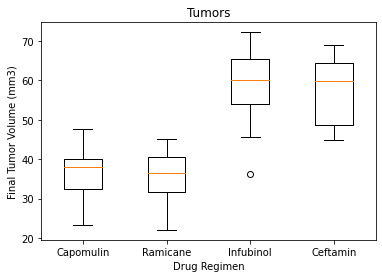

In [208]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxdata = [tumors, ramtumors, inftumors, ceftumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(boxdata, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [209]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capdf = mousedata.loc[mousedata["Drug Regimen"] == "Capomulin"]
capdf = capdf.reset_index()
capdf.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [210]:
chosenone = capdf.loc[capdf["Mouse ID"] == "g316"]
chosenone

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
176,351,g316,Capomulin,Female,22,22,0,45.000000,0
177,352,g316,Capomulin,Female,22,22,5,44.022752,0
178,353,g316,Capomulin,Female,22,22,10,44.502042,0
179,354,g316,Capomulin,Female,22,22,15,45.216743,0
180,355,g316,Capomulin,Female,22,22,20,45.933322,1
181,356,g316,Capomulin,Female,22,22,25,46.809225,1
182,357,g316,Capomulin,Female,22,22,30,44.221480,2
183,358,g316,Capomulin,Female,22,22,35,44.702833,2
184,359,g316,Capomulin,Female,22,22,40,45.565821,2
185,360,g316,Capomulin,Female,22,22,45,40.159220,2


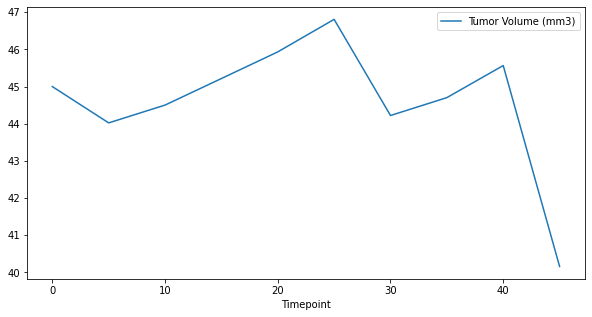

In [211]:
chosenone = chosenone.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
chosenone
chosenone = chosenone.reset_index(drop=True)
chosenone.set_index('Timepoint').plot(figsize=(10,5))
plt.show()

In [212]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterdf = capdf.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatterdf
avgtumor = pd.DataFrame(scatterdf.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avgtumor.head()
avgtumor = avgtumor.rename(columns={"Tumor Volume (mm3)":
                                   "Average Volume"})
avgtumor.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [213]:
avgtumor = avgtumor.set_index("Mouse ID")
avgtumor

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


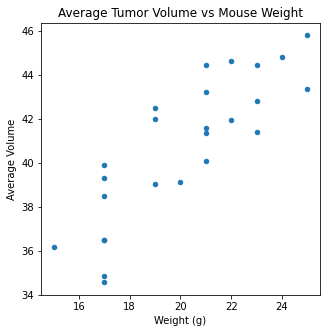

In [214]:
avgtumor.plot(kind="scatter", x="Weight (g)", y="Average Volume", figsize=(5,5), title="Average Tumor Volume vs Mouse Weight")
plt.show()

## Correlation and Regression

In [215]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = avgtumor.iloc[:,0]
tumorvolume = avgtumor.iloc[:,1]
correlation = st.pearsonr(weight,tumorvolume)
print(f"Correlation coefficient for mouse weight and average tumor volume for Capomulin is {round(correlation[0],2)}")

Correlation coefficient for mouse weight and average tumor volume for Capomulin is 0.84


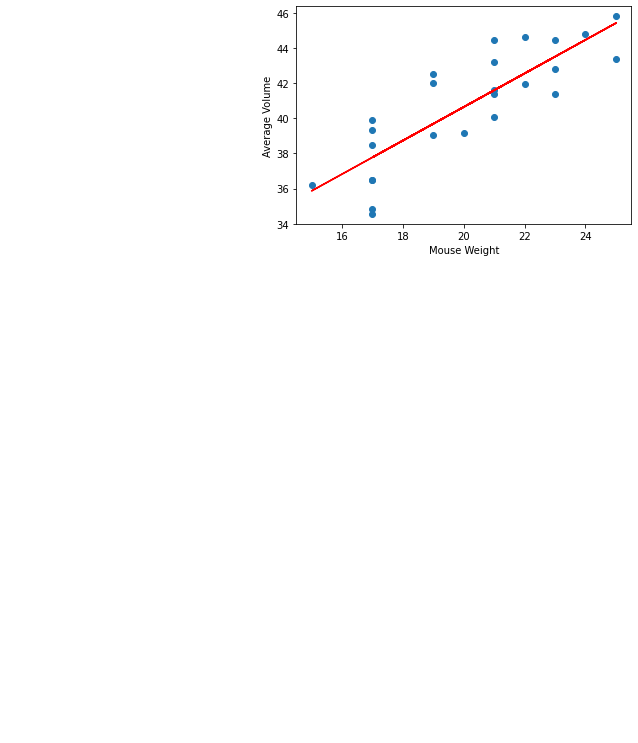

In [217]:
linregress
x_values = avgtumor["Weight (g)"]
y_values = avgtumor["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressvalue = x_values * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, )
plt.plot(x_values,regressvalue,"r-")
plt.annotate(line,(5,5),color="blue")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Volume")
plt.show()